<a href="https://colab.research.google.com/github/Sumit-Kumar-Dash/PyTorch/blob/main/PyTorch_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install torch numpy matplotlib pandas scikit-learn seaborn

In [7]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch.nn as nn
from torchvision import transforms,datasets
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix

plt.style.use('fivethirtyeight')

In [10]:
# loading the data
ROOT_DIR = 'MNIST'

train_data = datasets.MNIST(
    root = ROOT_DIR,
    train=True,
    transform=transforms.ToTensor(),
    target_transform=None,
    download=True
)
test_data = datasets.MNIST(
    root = ROOT_DIR,
    train=False,
    transform=transforms.ToTensor(),
    target_transform=None,
    download=True
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 34609883.77it/s]


Extracting MNIST/MNIST/raw/train-images-idx3-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1105696.57it/s]


Extracting MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 10323088.79it/s]


Extracting MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2460355.00it/s]

Extracting MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/MNIST/raw



In [12]:
train_data.data.dtype

torch.uint8

In [15]:
train_data.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [16]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [13]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [14]:
train_data.targets.dtype

torch.int64

<Axes: >

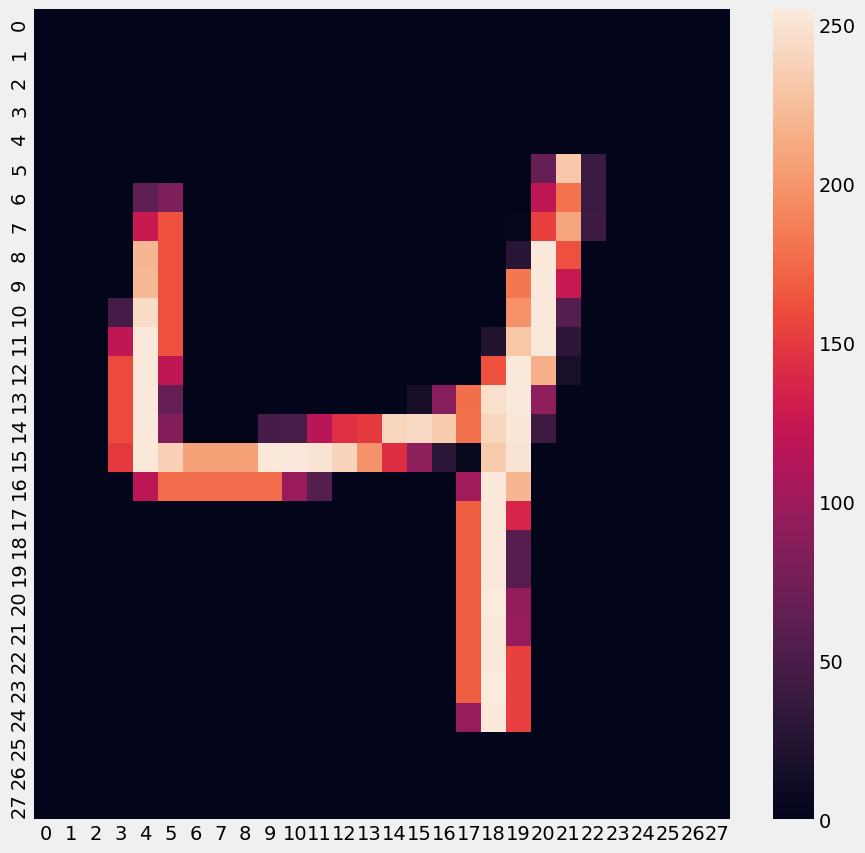

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(train_data.data[2])

<Axes: >

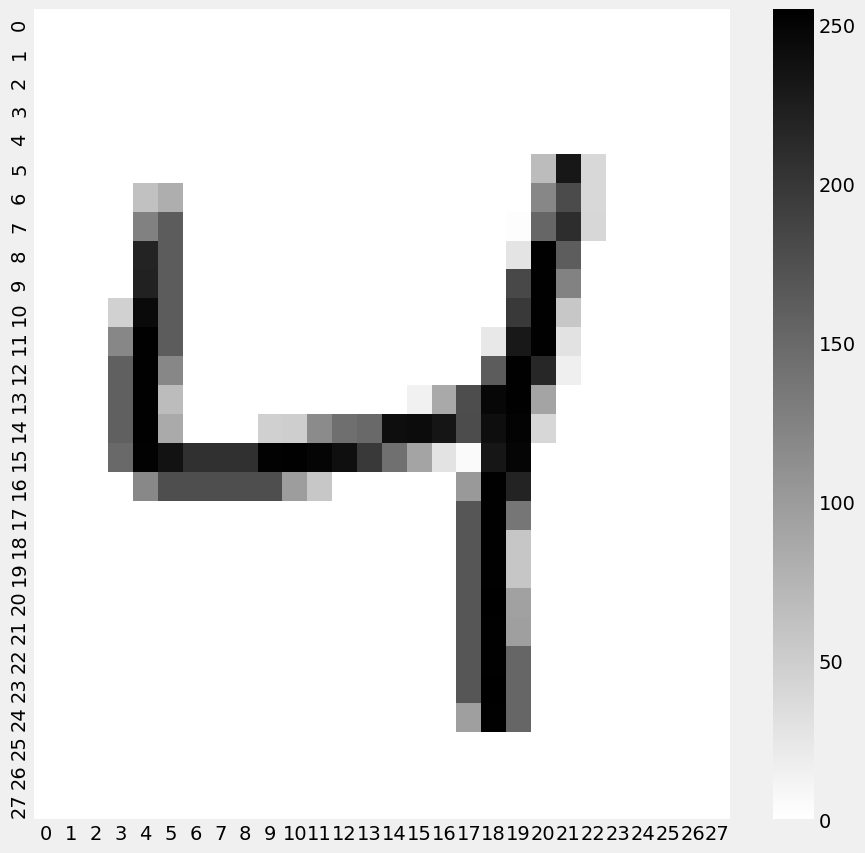

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(train_data.data[2],cmap='binary')

<Axes: >

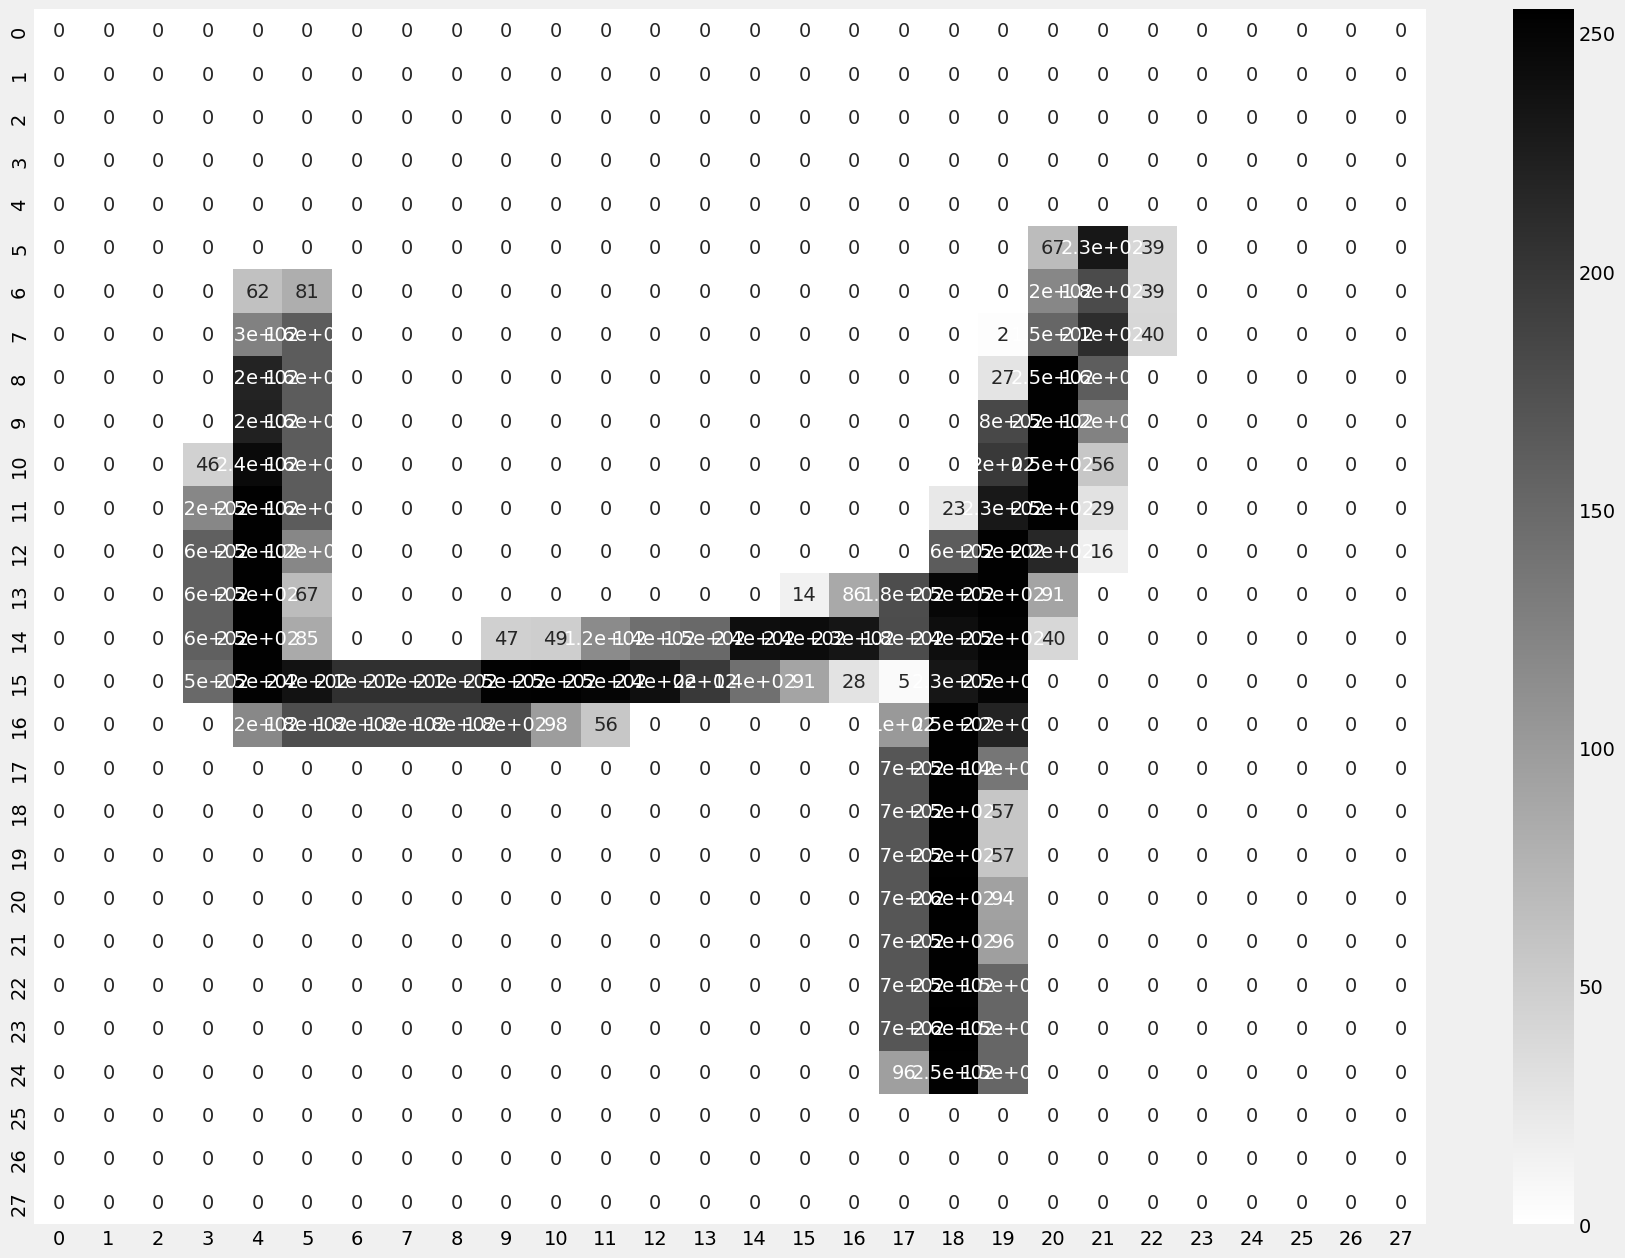

In [23]:
plt.figure(figsize=(20,15))
sns.heatmap(train_data.data[2],cmap='binary',annot=True)

<Axes: >

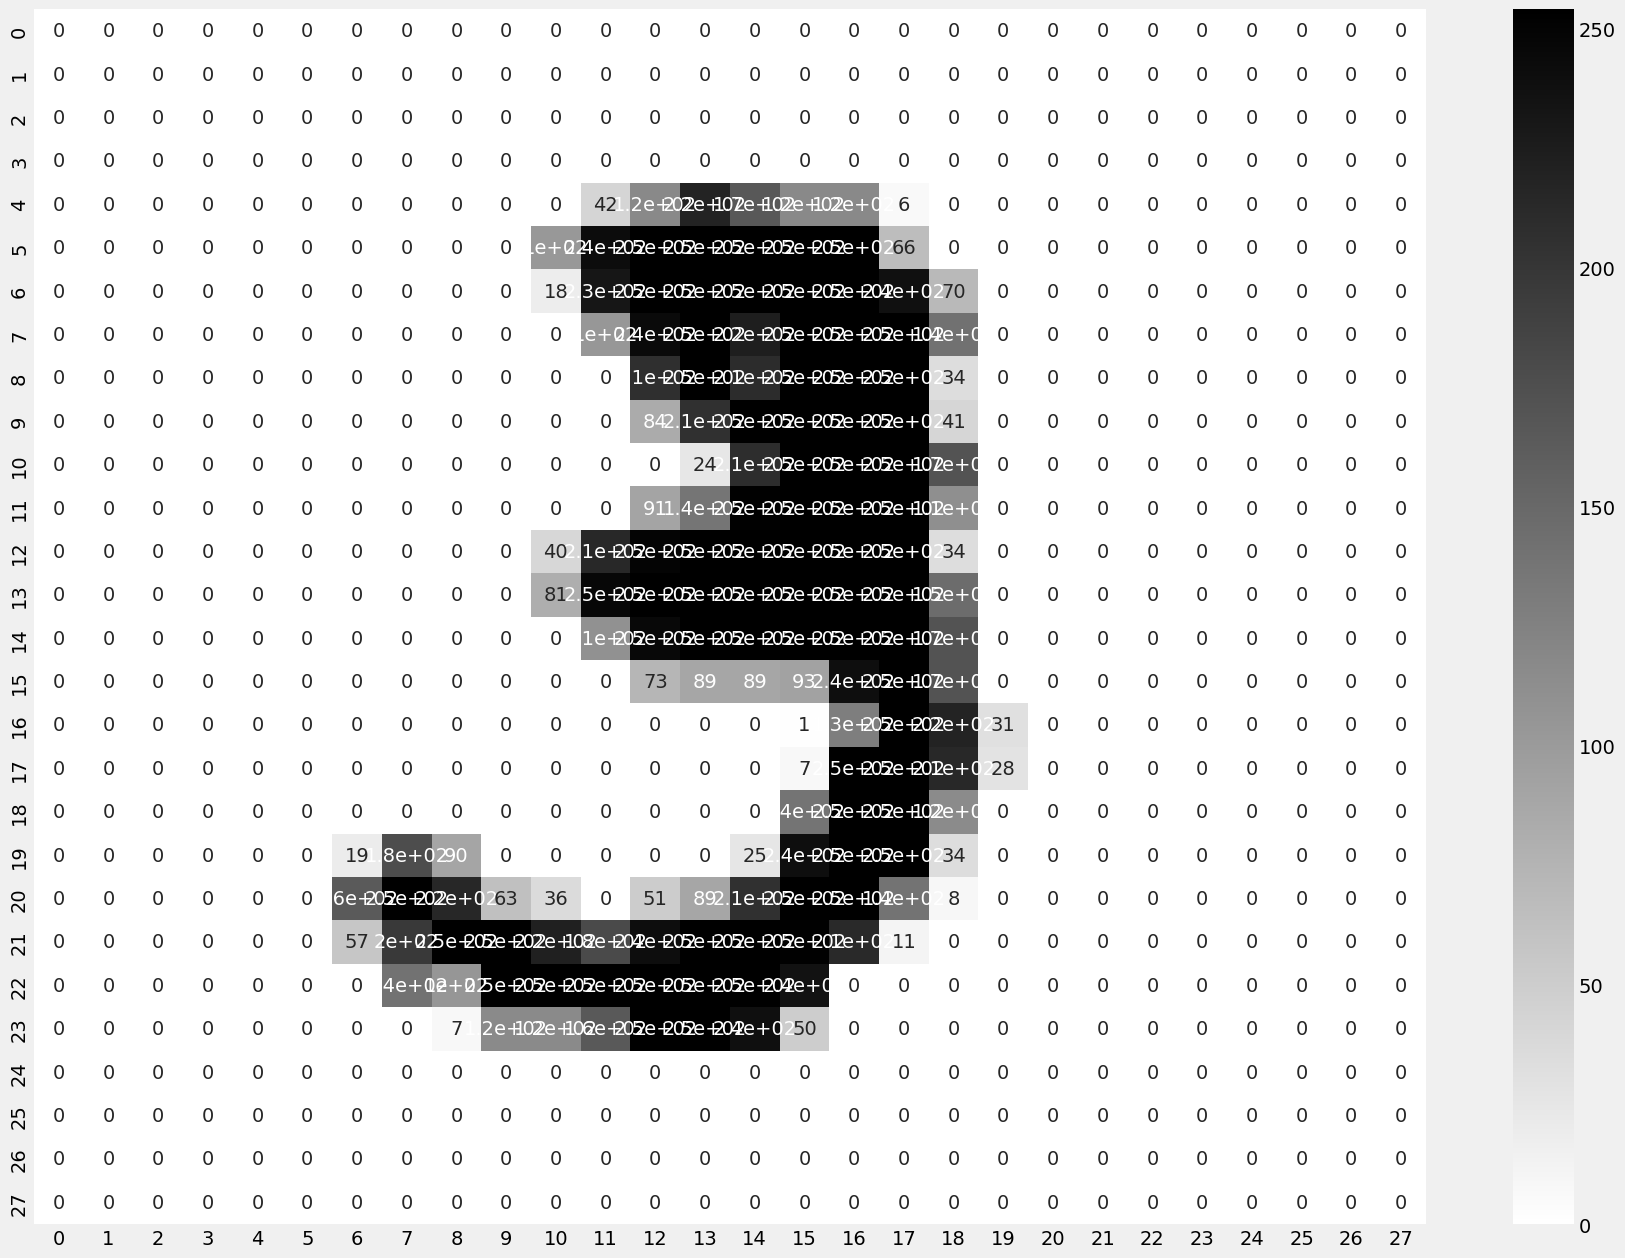

In [25]:
plt.figure(figsize=(20,15))
sns.heatmap(train_data.data[10],cmap='binary',annot=True)

In [26]:
train_data.data[0].shape #each number or digit in mnist data is of this size

torch.Size([28, 28])

In [31]:
train_data.data[0].dtype

torch.uint8

In [27]:
train_data.data[0].min(),train_data.data[0].max()   #binary value of each digit vary from 0 to 255(2^8 -1) => unsigned integer 8 bits

(tensor(0, dtype=torch.uint8), tensor(255, dtype=torch.uint8))

In [28]:
train_data.data.shape# total number of data points or digits = 60000

torch.Size([60000, 28, 28])

In [30]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [32]:
BATCH = 128
train_data_loader = DataLoader(dataset=train_data,
                               batch_size=BATCH,
                               shuffle =True)
test_data_loader = DataLoader(dataset=test_data,
                               batch_size=BATCH,
                               shuffle =True)

In [34]:
for x in test_data_loader:
  print(x[0].shape)
  print(x[1].shape)
  break

torch.Size([128, 1, 28, 28])
torch.Size([128])


In [37]:
DEVICE = "cuda" if torch.cuda.is_available() else 'cpu'
DEVICE

'cpu'

In [44]:
# model
class NeuralNetwork(nn.Module):
  def __init__(self,in_,out_):
    super(NeuralNetwork,self).__init__()
    self.layers = nn.Sequential(
        nn.Linear(in_,256),
        nn.ReLU(),
        nn.Linear(256,128),
        nn.ReLU(),
        nn.Linear(128,out_)
    )
  def forward(self,x):
    return self.layers(x)

In [45]:
model = NeuralNetwork(784,10)
model.to(DEVICE)
model

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [49]:
CE_loss  = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [50]:
## Training loop
EPOCHS = 10
loss_ = list()
acc_ = list()


for epoch in range(EPOCHS):
    print(f"Epoch: {epoch + 1}/{EPOCHS}")
    for batch, data in enumerate(train_data_loader):
        x = data[0].to(DEVICE)
        y = data[1].to(DEVICE)

        optimizer.zero_grad()

        y_pred = model(x.reshape(-1, 784))

        loss = CE_loss(y_pred, y)

        loss_.append(loss.item())
        loss.backward()
        optimizer.step()

        accuracy = torch.mean((torch.argmax(y_pred, 1) == y).float()).item()
        acc_.append(accuracy)

        if batch%100 == 0:
            print(f"   Batch: {batch}, Loss: {loss.item():.4f} Accuracy {accuracy:.4f}")

Epoch: 1/10
   Batch: 0, Loss: 2.3121 Accuracy 0.0781
   Batch: 100, Loss: 0.4743 Accuracy 0.8672
   Batch: 200, Loss: 0.3803 Accuracy 0.8906
   Batch: 300, Loss: 0.1839 Accuracy 0.9219
   Batch: 400, Loss: 0.1484 Accuracy 0.9844
Epoch: 2/10
   Batch: 0, Loss: 0.1963 Accuracy 0.9297
   Batch: 100, Loss: 0.2238 Accuracy 0.9375
   Batch: 200, Loss: 0.1775 Accuracy 0.9531
   Batch: 300, Loss: 0.1432 Accuracy 0.9688
   Batch: 400, Loss: 0.0590 Accuracy 0.9766
Epoch: 3/10
   Batch: 0, Loss: 0.0852 Accuracy 0.9766
   Batch: 100, Loss: 0.1485 Accuracy 0.9531
   Batch: 200, Loss: 0.0531 Accuracy 0.9922
   Batch: 300, Loss: 0.0836 Accuracy 0.9609
   Batch: 400, Loss: 0.0450 Accuracy 0.9844
Epoch: 4/10
   Batch: 0, Loss: 0.0912 Accuracy 0.9688
   Batch: 100, Loss: 0.0281 Accuracy 1.0000
   Batch: 200, Loss: 0.0580 Accuracy 0.9844
   Batch: 300, Loss: 0.0356 Accuracy 0.9922
   Batch: 400, Loss: 0.0291 Accuracy 0.9922
Epoch: 5/10
   Batch: 0, Loss: 0.0342 Accuracy 0.9844
   Batch: 100, Loss: 0.011

<Axes: >

<Figure size 1400x1400 with 0 Axes>

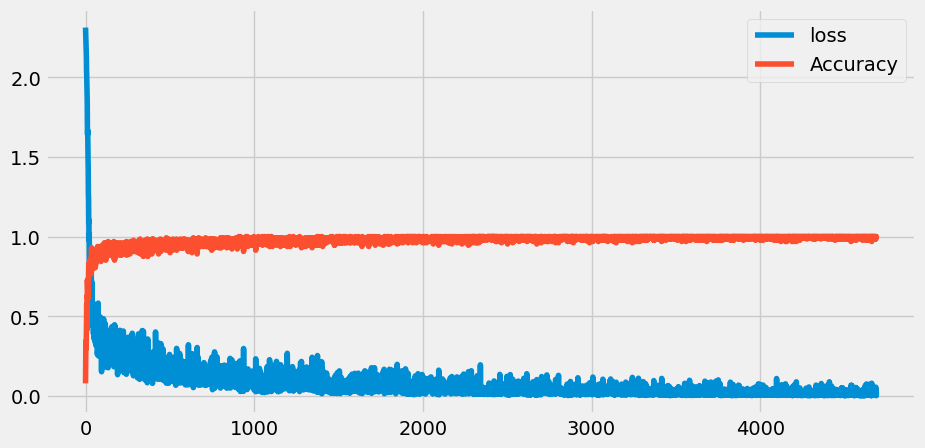

In [52]:
# plot the Train acc and loss
plt.figure(figsize=(14,14))
pd.DataFrame(data={'loss': loss_, "Accuracy": acc_}).plot(figsize=(10,5))

In [53]:
# testing over the test data

test_loss = 0
test_acc = 0

with torch.no_grad():
    for batch, data in enumerate(test_data_loader):
        x = data[0].to(DEVICE)
        y = data[1].to(DEVICE)

        y_pred = model(x.reshape(-1, 784))
        loss = CE_loss(y_pred, y)

        test_loss += loss.item()
        test_acc += torch.mean((torch.argmax(y_pred, 1) == y).float()).item()
        batch+=1

In [54]:
print(f"test loss: {test_loss/batch:.4f}, test accuracy: {test_acc/batch:.4f}")

test loss: 0.0885, test accuracy: 0.9775


<Axes: >

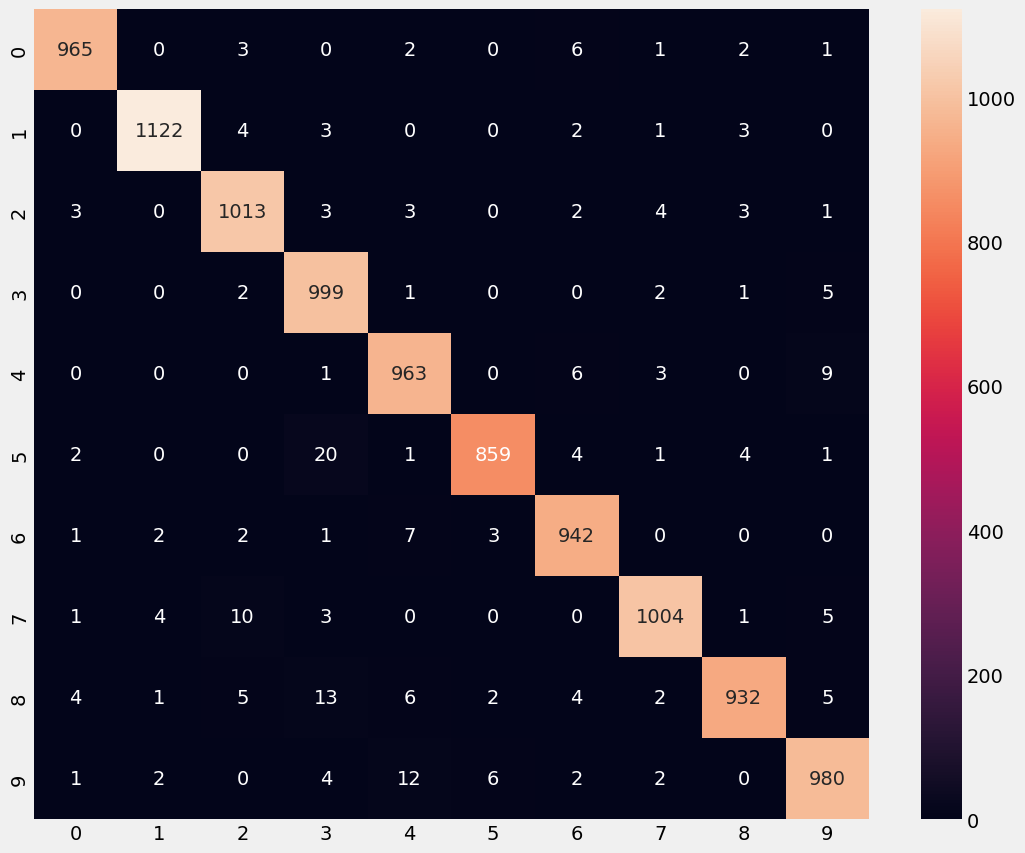

In [55]:
pred = np.array([])
target = np.array([])

with torch.no_grad():
    for batch, data in enumerate(test_data_loader):
        x = data[0].to(DEVICE)
        y = data[1].to(DEVICE)

        y_pred = model(x.reshape(-1, 784))
        loss = CE_loss(y_pred, y)

        pred = np.concatenate((pred, torch.argmax(y_pred, 1).cpu().numpy()))
        target = np.concatenate((target, y.cpu().numpy()))

cm = confusion_matrix(target, pred)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d')